In [2]:
import pandas as pd
import numpy as np
import subprocess
import random
from pipeline_script import pipeline
import seaborn as sns

In [3]:
participant_df = pd.read_csv(r"participant_info.csv")
df_8 = pd.read_csv(r"dreamt-dataset-for-real-time-sleep-stage-estimation-using-multisensor-wearable-technology-1.0.1/data/S008_whole_df.csv")

In [4]:
print(df_8.columns)
print(df_8["Sleep_Stage"].unique())
print(df_8["Sleep_Stage"].value_counts())
print(df_8["Obstructive_Apnea"].value_counts())
print(df_8["Central_Apnea"].value_counts())
print(df_8["Hypopnea"].value_counts())
print(df_8["Multiple_Events"].value_counts())
print(df_8["Multiple_Events"].unique())

Index(['TIMESTAMP', 'BVP', 'ACC_X', 'ACC_Y', 'ACC_Z', 'TEMP', 'EDA', 'HR',
       'IBI', 'Sleep_Stage', 'Obstructive_Apnea', 'Central_Apnea', 'Hypopnea',
       'Multiple_Events'],
      dtype='object')
['P' 'W' 'N1' 'N2' 'N3' 'R']
Sleep_Stage
N2    808320
P     608320
R     263040
N3    170880
W     111360
N1     82561
Name: count, dtype: int64
Obstructive_Apnea
1.0    9029
Name: count, dtype: int64
Central_Apnea
1.0    5497
Name: count, dtype: int64
Hypopnea
1.0    418772
Name: count, dtype: int64
Series([], Name: count, dtype: int64)
[nan]


<Axes: xlabel='Sleep_Stage'>

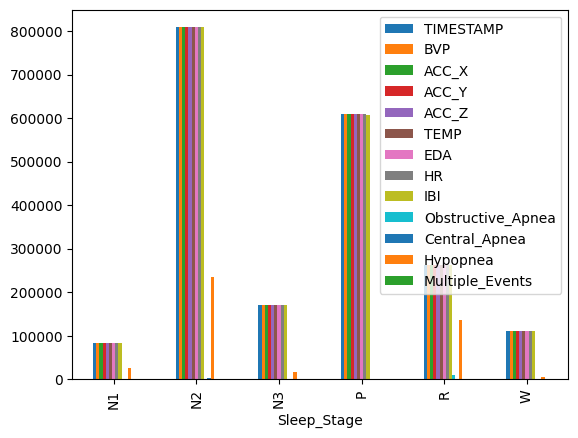

In [5]:
df_8.groupby("Sleep_Stage").count().plot.bar()

In [6]:
# Dosya yolu ve format
folder_path = "dreamt-dataset-for-real-time-sleep-stage-estimation-using-multisensor-wearable-technology-1.0.1/data/"
file_prefix = "S"
file_suffix = "_whole_df.csv"

# DataFrame'leri saklamak için bir liste
dataframes = []

# S002'den S103'e kadar dosyaları oku
for i in range(2, 104):  # 2'den 103'e kadar
    file_name = f"{file_prefix}{i:03}{file_suffix}"  # S002, S003 gibi isimler oluştur
    file_path = f"{folder_path}{file_name}"         # Tam dosya yolunu oluştur
    try:
        df = pd.read_csv(file_path)                 # Dosyayı oku
        dataframes.append(df)                       # Listeye ekle
    except FileNotFoundError:
        print(f"Dosya bulunamadı: {file_path}")



Dosya bulunamadı: dreamt-dataset-for-real-time-sleep-stage-estimation-using-multisensor-wearable-technology-1.0.1/data/S041_whole_df.csv
Dosya bulunamadı: dreamt-dataset-for-real-time-sleep-stage-estimation-using-multisensor-wearable-technology-1.0.1/data/S060_whole_df.csv


In [7]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import euclidean

# Örnek frekans hesaplama
freq_matrix = []
for df in dataframes:  # 100 DataFrame'lik liste
    freq = df['Sleep_Stage'].value_counts(normalize=True)
    freq = freq.reindex(['P', 'W', 'N1', 'N2', 'N3', 'R'], fill_value=0)
    freq_matrix.append(freq.values)

# Cosine Similarity
cosine_sim = cosine_similarity(freq_matrix)

# Euclidean Distance
euclidean_dist = np.zeros((len(freq_matrix), len(freq_matrix)))
for i in range(len(freq_matrix)):
    for j in range(len(freq_matrix)):
        euclidean_dist[i, j] = euclidean(freq_matrix[i], freq_matrix[j])


In [8]:
euclidean_dist.size

10000

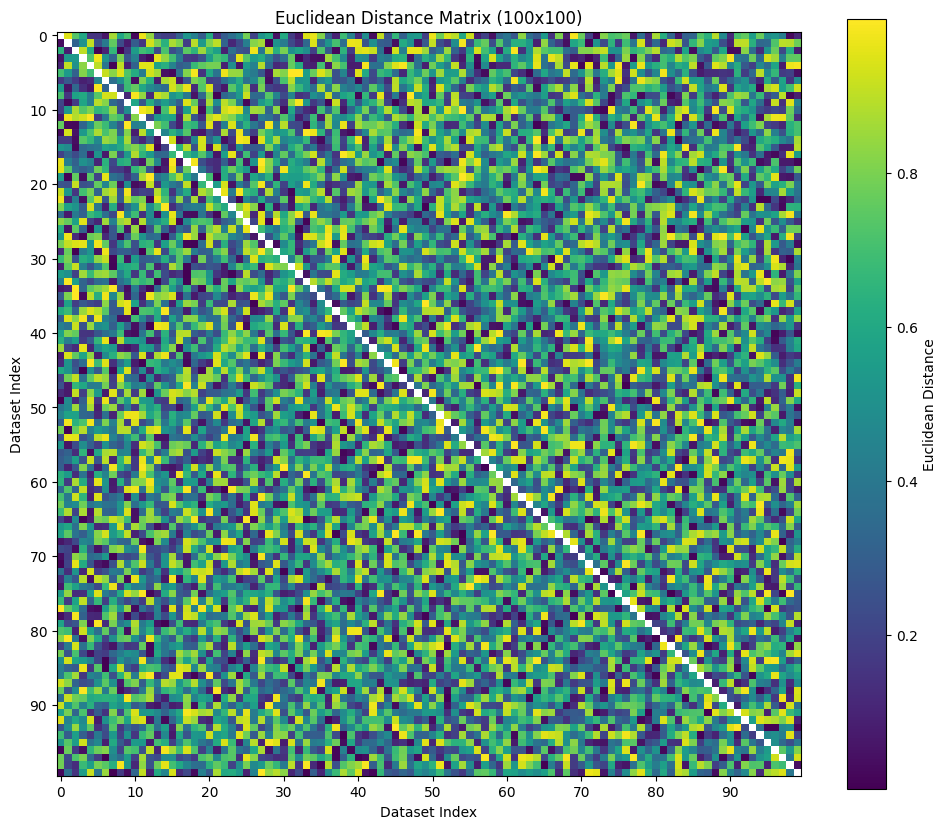

[((np.int64(29), np.int64(2)), np.float64(1.1634755366141114e-05))]

In [9]:
import matplotlib.pyplot as plt
# Simulating a 100x100 Euclidean distance matrix for demonstration
np.random.seed(42)  # For reproducibility
euclidean_dist_100x100 = np.random.rand(100, 100)
np.fill_diagonal(euclidean_dist_100x100, np.inf)  # Exclude diagonal values

# Find the indices of the smallest non-diagonal values (most similar datasets)
min_value = np.min(euclidean_dist_100x100)  # Find the minimum non-diagonal value
similar_indices_100x100 = np.argwhere(euclidean_dist_100x100 == min_value)  # Indices of minimum values

# Prepare the visualization
plt.figure(figsize=(12, 10))
plt.imshow(euclidean_dist_100x100, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Euclidean Distance')
plt.title('Euclidean Distance Matrix (100x100)')
plt.xlabel('Dataset Index')
plt.ylabel('Dataset Index')
plt.xticks(range(0, 100, 10), range(0, 100, 10))  # Reduce ticks for clarity
plt.yticks(range(0, 100, 10), range(0, 100, 10))
plt.show()

# Output the most similar pairs and their distances
similar_pairs_100x100 = [
    (tuple(pair), euclidean_dist_100x100[pair[0], pair[1]]) for pair in similar_indices_100x100
]
similar_pairs_100x100


In [10]:
# Find the 5 smallest non-diagonal distances and their indices
flattened_distances = euclidean_dist_100x100.flatten()
sorted_indices = np.argsort(flattened_distances)

# Extract the top 5 non-diagonal distances (ignoring infinities)
top_5_indices = []
top_5_values = []

for idx in sorted_indices:
    row, col = divmod(idx, euclidean_dist_100x100.shape[1])
    if row != col:  # Exclude diagonal values
        top_5_indices.append((row, col))
        top_5_values.append(euclidean_dist_100x100[row, col])
    if len(top_5_indices) == 5:
        break

# Combine pairs and their distances
top_5_similar_pairs = list(zip(top_5_indices, top_5_values))
top_5_similar_pairs


[((np.int64(29), np.int64(2)), np.float64(1.1634755366141114e-05)),
 ((np.int64(41), np.int64(51)), np.float64(3.071884538241587e-05)),
 ((np.int64(91), np.int64(87)), np.float64(5.282693229680113e-05)),
 ((np.int64(26), np.int64(4)), np.float64(0.00013469300448532007)),
 ((np.int64(47), np.int64(25)), np.float64(0.0002270382182555375))]

Dataset 29 and Dataset 2: 0.0000116
Dataset 41 and Dataset 51: 0.0000307
Dataset 91 and Dataset 87: 0.0000528
Dataset 26 and Dataset 4: 0.0001347
Dataset 47 and Dataset 25: 0.0002270

In [11]:
print(dataframes[29]["Sleep_Stage"].value_counts())
print(dataframes[2]["Sleep_Stage"].value_counts())

Sleep_Stage
N2    1111680
P      528960
N1     201600
R      124801
N3     122880
W       59520
Name: count, dtype: int64
Sleep_Stage
N2    814081
W     476160
P     377024
N1    312960
N3      1920
Name: count, dtype: int64


In [12]:
# Örnek frekans hesaplama
freq_matrix2 = []
for df in dataframes:  # 100 DataFrame'lik liste
    total_rows = len(df)  # Toplam satır sayısını al
    freq = df['Sleep_Stage'].value_counts() / total_rows  # Her değeri toplam satır sayısına böl
    freq = freq.reindex(['P', 'W', 'N1', 'N2', 'N3', 'R'], fill_value=0)  # Eksik değerler için 0 koy
    freq_matrix2.append(freq.values)

# Cosine Similarity
cosine_sim2 = cosine_similarity(freq_matrix2)

# Euclidean Distance
euclidean_dist2 = np.zeros((len(freq_matrix2), len(freq_matrix2)))
for i in range(len(freq_matrix2)):
    for j in range(len(freq_matrix2)):
        euclidean_dist2[i, j] = euclidean(freq_matrix2[i], freq_matrix2[j])



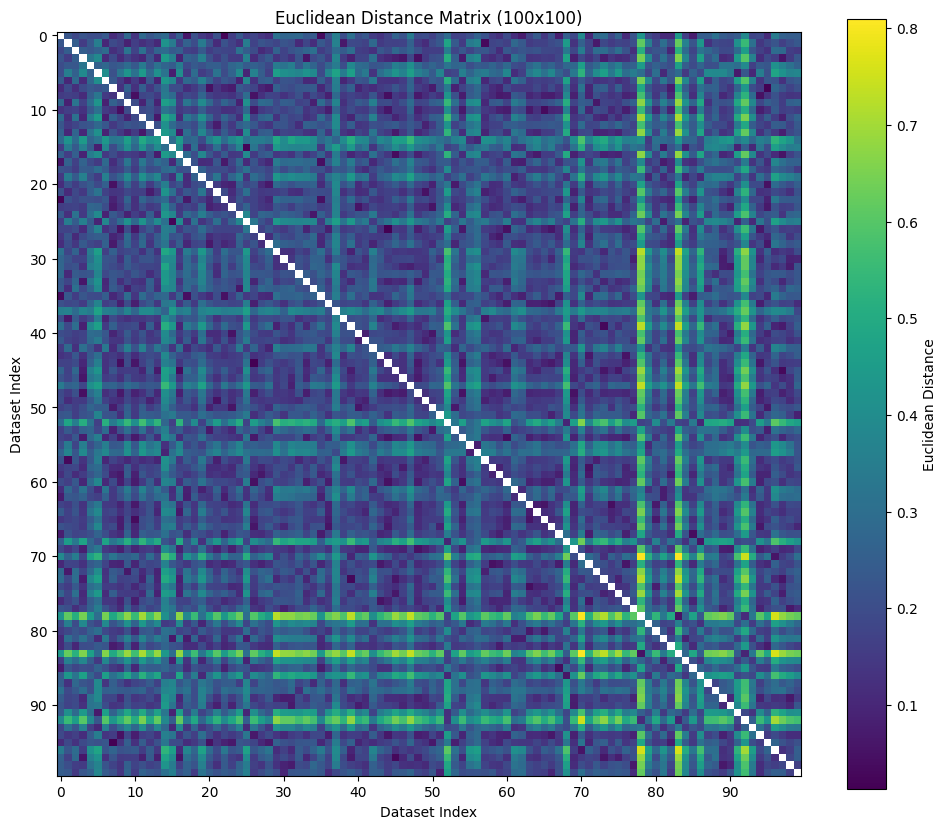

[((np.int64(7), np.int64(95)), np.float64(0.013518686808294498)),
 ((np.int64(95), np.int64(7)), np.float64(0.013518686808294498))]

In [13]:
# Simulating a 100x100 Euclidean distance matrix for demonstration
np.random.seed(42)  # For reproducibility
euclidean_dist2_100x100 = euclidean_dist2
np.fill_diagonal(euclidean_dist2_100x100, np.inf)  # Exclude diagonal values

# Find the indices of the smallest non-diagonal values (most similar datasets)
min_value = np.min(euclidean_dist2_100x100)  # Find the minimum non-diagonal value
similar_indices_100x100 = np.argwhere(euclidean_dist2_100x100 == min_value)  # Indices of minimum values

# Prepare the visualization
plt.figure(figsize=(12, 10))
plt.imshow(euclidean_dist2_100x100, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Euclidean Distance')
plt.title('Euclidean Distance Matrix (100x100)')
plt.xlabel('Dataset Index')
plt.ylabel('Dataset Index')
plt.xticks(range(0, 100, 10), range(0, 100, 10))  # Reduce ticks for clarity
plt.yticks(range(0, 100, 10), range(0, 100, 10))
plt.show()

# Output the most similar pairs and their distances
similar_pairs_100x100 = [
    (tuple(pair), euclidean_dist2_100x100[pair[0], pair[1]]) for pair in similar_indices_100x100
]
similar_pairs_100x100

In [14]:
# Find the 5 smallest non-diagonal distances and their indices
flattened_distances = euclidean_dist2_100x100.flatten()
sorted_indices = np.argsort(flattened_distances)

# Extract the top 5 non-diagonal distances (ignoring infinities)
top_5_indices = []
top_5_values = []

for idx in sorted_indices:
    row, col = divmod(idx, euclidean_dist2_100x100.shape[1])
    if row != col:  # Exclude diagonal values
        top_5_indices.append((row, col))
        top_5_values.append(euclidean_dist2_100x100[row, col])
    if len(top_5_indices) == 10:
        break

# Combine pairs and their distances
top_5_similar_pairs = list(zip(top_5_indices, top_5_values))
top_5_similar_pairs


[((np.int64(7), np.int64(95)), np.float64(0.013518686808294498)),
 ((np.int64(95), np.int64(7)), np.float64(0.013518686808294498)),
 ((np.int64(44), np.int64(26)), np.float64(0.016219856793540755)),
 ((np.int64(26), np.int64(44)), np.float64(0.016219856793540755)),
 ((np.int64(15), np.int64(25)), np.float64(0.023750850161370327)),
 ((np.int64(25), np.int64(15)), np.float64(0.023750850161370327)),
 ((np.int64(0), np.int64(22)), np.float64(0.02476576526436288)),
 ((np.int64(22), np.int64(0)), np.float64(0.02476576526436288)),
 ((np.int64(39), np.int64(73)), np.float64(0.031050408992662988)),
 ((np.int64(73), np.int64(39)), np.float64(0.031050408992662988))]

In [15]:
max = 0
max_list = [0,0]
counter1 = 0
for x in euclidean_dist2:
    counter2 = 0
    for y in x:
        if y > max and y != np.inf:
            max_list[0] = counter1
            max_list[1] = counter2
            max = y
        counter2 += 1
    counter1 += 1
        
print(max)
print(max_list[0])
print(max_list[1])

0.8097113246177072
70
83


In [16]:
flat_matrix = euclidean_dist2.flatten()
valid_indices = np.where(flat_matrix != np.inf)[0]

# Get the indices of the top 10 valid values
top_10_indices = valid_indices[np.argpartition(flat_matrix[valid_indices], -10)[-10:]]

# Sort the indices based on the values
top_10_sorted_indices = top_10_indices[np.argsort(-flat_matrix[top_10_indices])]

# Get the row and column indices from the sorted flat indices
top_10_values = [(index, flat_matrix[index]) for index in top_10_sorted_indices]
indices = [(i // euclidean_dist2.shape[1], i % euclidean_dist2.shape[1]) for i, _ in top_10_values]

# Print the indices and their corresponding values
for idx, (row, col) in enumerate(indices):
    print(f"Rank {idx + 1}: Value {euclidean_dist2[row, col]} at Index ({row}, {col})")


Rank 1: Value 0.8097113246177072 at Index (83, 70)
Rank 2: Value 0.8097113246177072 at Index (70, 83)
Rank 3: Value 0.8037784279546313 at Index (78, 70)
Rank 4: Value 0.8037784279546313 at Index (70, 78)
Rank 5: Value 0.7620660534963671 at Index (83, 96)
Rank 6: Value 0.7620660534963671 at Index (96, 83)
Rank 7: Value 0.7568572383167653 at Index (78, 96)
Rank 8: Value 0.7568572383167653 at Index (96, 78)
Rank 9: Value 0.7478561719762268 at Index (70, 92)
Rank 10: Value 0.7478561719762268 at Index (92, 70)


Rank 1: Value 0.8097113246177072 at Index (83, 70)
Rank 2: Value 0.8097113246177072 at Index (70, 83)
Rank 3: Value 0.8037784279546313 at Index (70, 78)
Rank 4: Value 0.8037784279546313 at Index (78, 70)
Rank 5: Value 0.7620660534963671 at Index (96, 83)
Rank 6: Value 0.7620660534963671 at Index (83, 96)
Rank 7: Value 0.7568572383167653 at Index (96, 78)
Rank 8: Value 0.7568572383167653 at Index (78, 96)
Rank 9: Value 0.7478561719762268 at Index (92, 70)
Rank 10: Value 0.7478561719762268 at Index (70, 92)

In [18]:
print(dataframes[91]["Sleep_Stage"].value_counts())
print(dataframes[69]["Sleep_Stage"].value_counts())

Sleep_Stage
W          936961
N2         560640
P          435136
N1          74880
N3           3840
Missing      1920
Name: count, dtype: int64
Sleep_Stage
N2    927361
P     475776
W     286080
R     209280
N1    124800
N3     26880
Name: count, dtype: int64


In [19]:
def get_top_disease_counts(dataframes, disease_name, initial_count=5):
    """
    Function to get the top counts of a specific disease in a list of dataframes.

    Args:
        dataframes (list): List of pandas DataFrames.
        disease_name (str): The column name representing the disease.
        initial_count (int): Number of top entries to initialize with.

    Returns:
        tuple: (most_obs_disease_has, most_obs_disease_indexes) sorted by counts in descending order
    """
    # Initialize with the first `initial_count` dataframes
    most_obs_disease_has = [
        dataframes[i][disease_name].value_counts().get(1, 0) for i in range(initial_count)
    ]
    most_obs_disease_indexes = list(range(initial_count))
    
    # Find the minimum value in the initial list
    min_val = min(most_obs_disease_has)

    # Loop through remaining dataframes
    for idx, df in enumerate(dataframes):
        if idx < initial_count:
            continue
        
        # Get the count of '1's for the current disease
        disease_count = df[disease_name].value_counts().get(1, 0)
        
        if disease_count > min_val:
            # Find the index of the minimum value in the current list
            min_index = most_obs_disease_has.index(min_val)
            
            # Replace the minimum value and its corresponding index
            most_obs_disease_has[min_index] = disease_count
            most_obs_disease_indexes[min_index] = idx
            
            # Update the minimum value
            min_val = min(most_obs_disease_has)

    # Sort the results by count in descending order
    sorted_indices = sorted(
        range(len(most_obs_disease_has)), 
        key=lambda k: most_obs_disease_has[k], 
        reverse=True
    )
    most_obs_disease_has = [most_obs_disease_has[i] for i in sorted_indices]
    most_obs_disease_indexes = [most_obs_disease_indexes[i] for i in sorted_indices]

    return most_obs_disease_has, most_obs_disease_indexes


In [20]:
most_obs_apnea_has, most_obs_apnea_indexes = get_top_disease_counts(dataframes, "Obstructive_Apnea", initial_count=5)
print("Top counts of obstructive apnea:", most_obs_apnea_has)
print("Indexes of dataframes:", most_obs_apnea_indexes)

Top counts of obstructive apnea: [np.int64(534052), np.int64(301619), np.int64(180011), np.int64(171208), np.int64(133783)]
Indexes of dataframes: [43, 55, 44, 64, 56]


In [21]:
participant_df.loc[participant_df["SID"]=="S059"]

,SID,AGE,GENDER,BMI,OAHI,AHI,Mean_SaO2,Arousal Index,MEDICAL_HISTORY,Sleep_Disorders
56,S059,49.0,F,38.0,127,127,88%,132,NaN,sleep apnea


In [22]:
df = {}

In [23]:
df[46] = pipeline(r"dreamt-dataset-for-real-time-sleep-stage-estimation-using-multisensor-wearable-technology-1.0.1\data\S046_whole_df.csv")
df[58] = pipeline(r"dreamt-dataset-for-real-time-sleep-stage-estimation-using-multisensor-wearable-technology-1.0.1\data\S058_whole_df.csv")
df[47] = pipeline(r"dreamt-dataset-for-real-time-sleep-stage-estimation-using-multisensor-wearable-technology-1.0.1\data\S047_whole_df.csv")
df[68] = pipeline(r"dreamt-dataset-for-real-time-sleep-stage-estimation-using-multisensor-wearable-technology-1.0.1\data\S068_whole_df.csv")
df[59] = pipeline(r"dreamt-dataset-for-real-time-sleep-stage-estimation-using-multisensor-wearable-technology-1.0.1\data\S059_whole_df.csv")


In [24]:
sleep_stage_order = ["P", "W", "N1", "N2", "N3", "R"]

# Function to preprocess and sort data by the desired order
def preprocess_and_plot(data, color, label):
    grouped_data = data.loc[:, ["Sleep_Stage", "IBI_Moving_Average_640"]].groupby("Sleep_Stage").count() / (64 * 60)
    # Align to the desired order
    grouped_data = grouped_data.reindex(sleep_stage_order)
    plt.plot(sleep_stage_order, grouped_data["IBI_Moving_Average_640"], color=color, label=label)


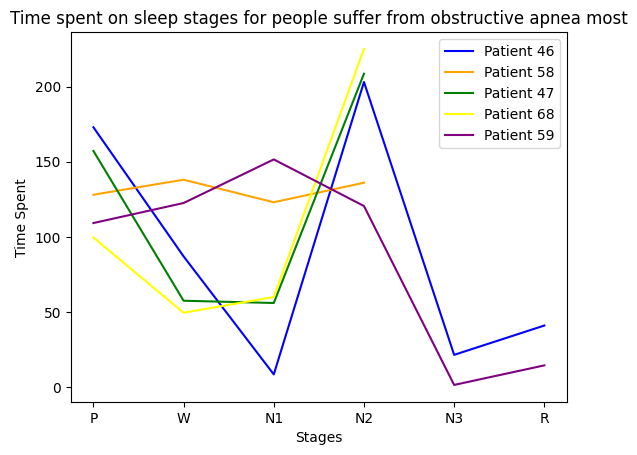

In [25]:

preprocess_and_plot(df[46], color="blue", label="Patient 46")
preprocess_and_plot(df[58], color="orange", label="Patient 58")
preprocess_and_plot(df[47], color="green", label="Patient 47")
preprocess_and_plot(df[68], color="yellow", label="Patient 68")
preprocess_and_plot(df[59], color="purple", label="Patient 59")

plt.title("Time spent on sleep stages for people suffer from obstructive apnea most")
plt.xlabel("Stages")
plt.ylabel("Time Spent")
plt.legend()
plt.show()

In [26]:
participant_df[participant_df["Sleep_Disorders"].isna()]

,SID,AGE,GENDER,BMI,OAHI,AHI,Mean_SaO2,Arousal Index,MEDICAL_HISTORY,Sleep_Disorders
46,S049,51.00,F,46.0,4,4,91%,3,"Anxiety, GERD, Hypertension",NaN
49,S052,30.14,M,32.0,6,6,96%,28,Body Pain,NaN
65,S069,53.94,F,40.0,19,19,96%,27,Hypertension,NaN
66,S070,55.07,F,31.0,32,33,94%,20,"Anxiety, Body Pain",NaN
75,S079,42.47,M,29.0,27,29,95%,19,NaN,NaN
94,S098,66.13,F,37.0,23,23,95%,25,"Anxiety, Body Pain, GERD, Hypertension",NaN


In [27]:
df[49] = pipeline(r"dreamt-dataset-for-real-time-sleep-stage-estimation-using-multisensor-wearable-technology-1.0.1\data\S049_whole_df.csv")
df[52] = pipeline(r"dreamt-dataset-for-real-time-sleep-stage-estimation-using-multisensor-wearable-technology-1.0.1\data\S052_whole_df.csv")
df[69] = pipeline(r"dreamt-dataset-for-real-time-sleep-stage-estimation-using-multisensor-wearable-technology-1.0.1\data\S069_whole_df.csv")
df[70] = pipeline(r"dreamt-dataset-for-real-time-sleep-stage-estimation-using-multisensor-wearable-technology-1.0.1\data\S070_whole_df.csv")
df[79] = pipeline(r"dreamt-dataset-for-real-time-sleep-stage-estimation-using-multisensor-wearable-technology-1.0.1\data\S079_whole_df.csv")
df[98] = pipeline(r"dreamt-dataset-for-real-time-sleep-stage-estimation-using-multisensor-wearable-technology-1.0.1\data\S098_whole_df.csv")

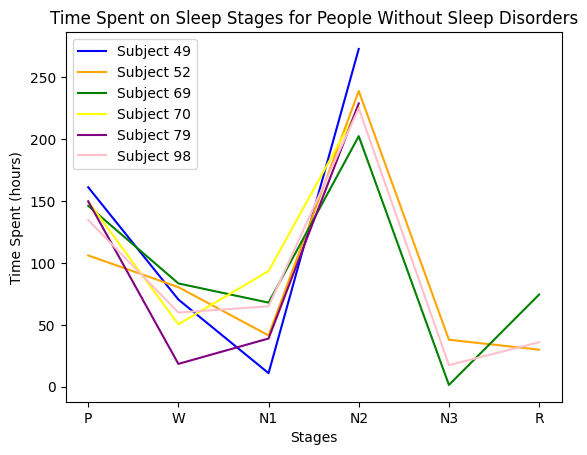

In [28]:
preprocess_and_plot(df[49], color="blue", label="Subject 49")
preprocess_and_plot(df[52], color="orange", label="Subject 52")
preprocess_and_plot(df[69], color="green", label="Subject 69")
preprocess_and_plot(df[70], color="yellow", label="Subject 70")
preprocess_and_plot(df[79], color="purple", label="Subject 79")
preprocess_and_plot(df[98], color="pink", label="Subject 98")

# Add title and labels
plt.title("Time Spent on Sleep Stages for People Without Sleep Disorders")
plt.xlabel("Stages")
plt.ylabel("Time Spent (hours)")
plt.legend()
plt.show()

In [29]:
print(participant_df["Sleep_Disorders"][40])
print(participant_df["Sleep_Disorders"][52])
print(participant_df["Sleep_Disorders"][41])
print(participant_df["Sleep_Disorders"][60])
print(participant_df["Sleep_Disorders"][53])

Snoring
OSA, RLS
Snoring
snoring, EDS
OSA


In [77]:
most_central_apnea_has, most_central_apnea_indexes = get_top_disease_counts(dataframes, "Central_Apnea", initial_count=5)
print("Top counts of central apnea:", most_central_apnea_has)
print("Indexes of dataframes:", most_central_apnea_indexes)

Top counts of central apnea: [277017, 194928, 160898, 108425, 76630]
Indexes of dataframes: [79, 35, 2, 14, 15]


In [ ]:
print(participant_df["Sleep_Disorders"][75])
print(participant_df["Sleep_Disorders"][33])
print(participant_df["Sleep_Disorders"][0])
print(participant_df["Sleep_Disorders"][12])
print(participant_df["Sleep_Disorders"][13])

nan
Snoring
OSA
snoring, snort, RLS
Chronic fatigue


In [35]:
participant_df.iloc[13]

SID                                S015
AGE                               26.63
GENDER                                F
BMI                                30.0
OAHI                                  1
AHI                                   1
Mean_SaO2                           96%
Arousal Index                        18
MEDICAL_HISTORY    Depression, Diabetes
Sleep_Disorders         Chronic fatigue
Name: 13, dtype: object

In [36]:
df[79] = pipeline(r"dreamt-dataset-for-real-time-sleep-stage-estimation-using-multisensor-wearable-technology-1.0.1\data\S079_whole_df.csv")
df[35] = pipeline(r"dreamt-dataset-for-real-time-sleep-stage-estimation-using-multisensor-wearable-technology-1.0.1\data\S035_whole_df.csv")
df[2] = pipeline(r"dreamt-dataset-for-real-time-sleep-stage-estimation-using-multisensor-wearable-technology-1.0.1\data\S002_whole_df.csv")
df[14] = pipeline(r"dreamt-dataset-for-real-time-sleep-stage-estimation-using-multisensor-wearable-technology-1.0.1\data\S014_whole_df.csv")
df[15] = pipeline(r"dreamt-dataset-for-real-time-sleep-stage-estimation-using-multisensor-wearable-technology-1.0.1\data\S015_whole_df.csv")

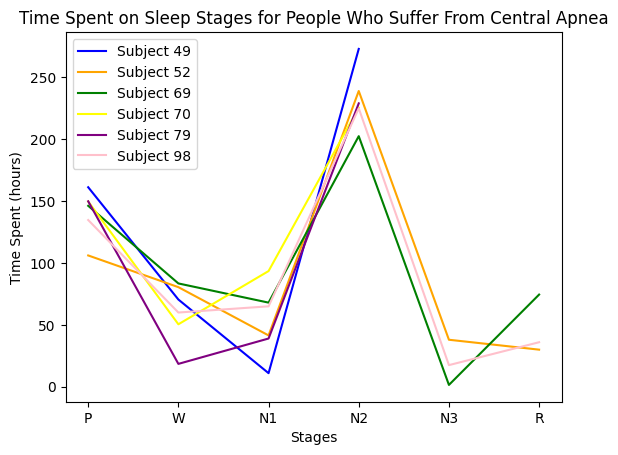

In [37]:
preprocess_and_plot(df[49], color="blue", label="Subject 49")
preprocess_and_plot(df[52], color="orange", label="Subject 52")
preprocess_and_plot(df[69], color="green", label="Subject 69")
preprocess_and_plot(df[70], color="yellow", label="Subject 70")
preprocess_and_plot(df[79], color="purple", label="Subject 79")
preprocess_and_plot(df[98], color="pink", label="Subject 98")

# Add title and labels
plt.title("Time Spent on Sleep Stages for People Who Suffer From Central Apnea")
plt.xlabel("Stages")
plt.ylabel("Time Spent (hours)")
plt.legend()
plt.show()

In [78]:
most_hypopnea_has, most_hypopnea_indexes = get_top_disease_counts(dataframes, "Hypopnea", initial_count=5)
print("Top counts of hypopnea:", most_hypopnea_has)
print("Indexes of dataframes:", most_hypopnea_indexes)

Top counts of hypopnea: [611656, 609482, 517629, 481216, 444221]
Indexes of dataframes: [56, 58, 57, 33, 29]


In [ ]:
print(participant_df["Sleep_Disorders"][53])
print(participant_df["Sleep_Disorders"][55])
print(participant_df["Sleep_Disorders"][54])
print(participant_df["Sleep_Disorders"][31])
print(participant_df["Sleep_Disorders"][27])

sleep apnea
snoring, sleep apnea, diffifulty breathing, snorts, RLS, EDS
sleep apnea, EDS
EDS, snoring
EDS, fatigue, snoring


In [75]:
participant_df.iloc[53]

SID                S056
AGE                69.3
GENDER                F
BMI                37.0
OAHI                  8
AHI                   8
Mean_SaO2           96%
Arousal Index        41
MEDICAL_HISTORY     NaN
Sleep_Disorders     OSA
Name: 53, dtype: object

In [38]:
df[56] = pipeline(r"dreamt-dataset-for-real-time-sleep-stage-estimation-using-multisensor-wearable-technology-1.0.1\data\S056_whole_df.csv")
df[55] = pipeline(r"dreamt-dataset-for-real-time-sleep-stage-estimation-using-multisensor-wearable-technology-1.0.1\data\S055_whole_df.csv")
df[54] = pipeline(r"dreamt-dataset-for-real-time-sleep-stage-estimation-using-multisensor-wearable-technology-1.0.1\data\S054_whole_df.csv")
df[31] = pipeline(r"dreamt-dataset-for-real-time-sleep-stage-estimation-using-multisensor-wearable-technology-1.0.1\data\S031_whole_df.csv")
df[53] = pipeline(r"dreamt-dataset-for-real-time-sleep-stage-estimation-using-multisensor-wearable-technology-1.0.1\data\S053_whole_df.csv")

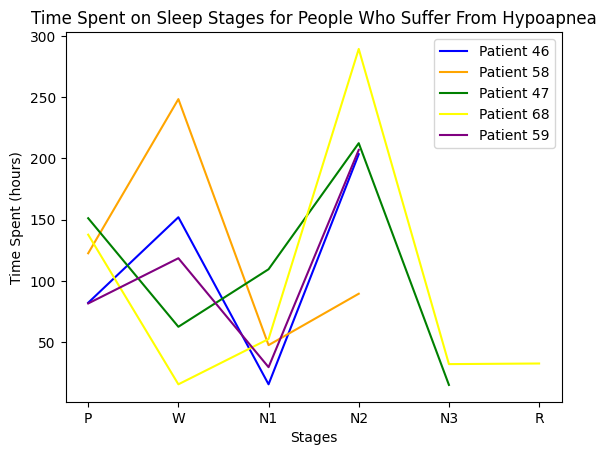

In [39]:
preprocess_and_plot(df[56], color="blue", label="Patient 46")
preprocess_and_plot(df[55], color="orange", label="Patient 58")
preprocess_and_plot(df[54], color="green", label="Patient 47")
preprocess_and_plot(df[31], color="yellow", label="Patient 68")
preprocess_and_plot(df[53], color="purple", label="Patient 59")

# Add title and labels
plt.title("Time Spent on Sleep Stages for People Who Suffer From Hypoapnea")
plt.xlabel("Stages")
plt.ylabel("Time Spent (hours)")
plt.legend()
plt.show()

In [85]:
print(participant_df["MEDICAL_HISTORY"][53])
print(participant_df["MEDICAL_HISTORY"][55])
print(participant_df["MEDICAL_HISTORY"][54])
print(participant_df["MEDICAL_HISTORY"][31])
print(participant_df["MEDICAL_HISTORY"][27])

nan
Body Pain, CAD, Depression, GERD, Hypertension
Dyspnea, Hypertension
nan
Anxiety, Asthma, Depression, Hypertension, Migraine
